In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('loan/loan.csv')
df = pd.read_csv('loan/loan.csv')

C:\Users\ANKITA\AppData\Local\Temp\ipykernel_8964\2687993151.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


In [26]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking data set have nan value or not

In [27]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [29]:
df.num_tl_90g_dpd_24m.isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
39712    True
39713    True
39714    True
39715    True
39716    True
Name: num_tl_90g_dpd_24m, Length: 39717, dtype: bool

### Checking data frame shape

In [30]:
df.shape

(39717, 111)

### We are able to see there is nan values are present in dataframe

In [31]:
null_sum = df.isnull().sum()

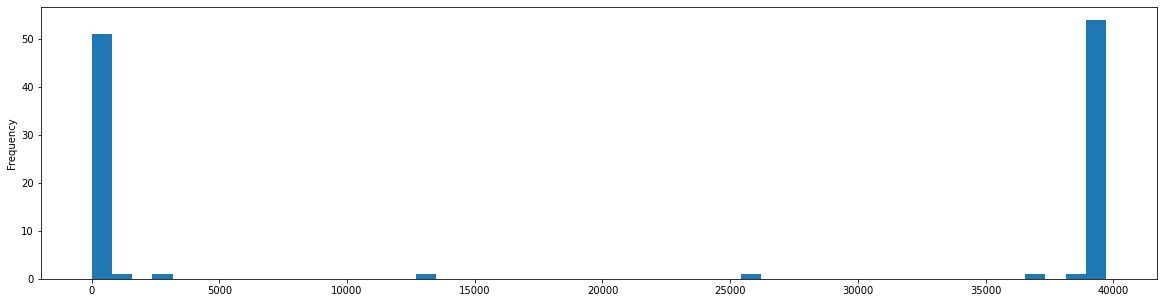

In [32]:
null_sum.plot(kind='hist', bins=50, figsize=(20,5))
plt.show()

In [33]:
df_high_null = null_sum.loc[(null_sum.values > 10000) & (null_sum.values < 39717)]

### Dropping Columns having greater than 10000 null values

In [34]:
df.drop(columns=list(null_sum[null_sum.values > 10000].index), inplace=True)

In [35]:
# df.isnull().sum() # To check how many nan values are present now
df.shape

(39717, 53)

### Getting unique value

In [36]:
unique_val = df.nunique()

In [37]:
unique_val

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

### Dropping single value since they will not be effective in analysis

In [38]:
single_value = unique_val[unique_val.values == 1]
single_value

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

### Above columns are with single value

In [39]:
df.drop(columns = list(single_value.index), inplace = True)

In [40]:
df.shape

(39717, 44)

### Removing those columns which are not useful for analysis

In [41]:
delete_cols = [
    "id", "member_id", "out_prncp", "out_prncp_inv", "total_rec_prncp",
    "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",
    "last_pymnt_d", "last_credit_pull_d", "total_pymnt", "last_pymnt_amnt", "url", "zip_code", "emp_title"
]

df.drop(columns = delete_cols, inplace=True) # dropping unnecessary columns

In [42]:
df.shape # checking shape after deleting columns

(39717, 28)

In [43]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt_inv,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,11567.149118,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,8942.672613,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,5112.310000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,9287.150000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,15798.810000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.680000,2.000000


## Starting Data Analysis 

In [44]:
df.loan_status.value_counts() # checking how many types of status is present

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Current --> stands for those customer, their emi is going on.
#### So for our analysis we do not need 'Current' data.

In [45]:
df = df[~(df.loan_status == 'Current')] # removing data which have 'Current' as loan status

In [46]:
df.loan_status.value_counts() # As we can see 'Current' status is removed

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [47]:
### Checking missing values
(df.isna().sum()/len(df.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028514
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
total_pymnt_inv         0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [ ]:
### As can be seen, Columns with missing values are

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

In [51]:
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [ ]:
### Mode value has far higher frequency than that of next highest frequency which means we can safely assign the value of mode
### to the null value in the column. also the missing values are in very low percentage, So imputing with mode doesnt affect 
### analysis much.

In [52]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [ ]:
## Standardising the data 
### "emp_length" --> (< 1 year) is assumed as 0 and 10+ years is assumed as 10 

In [53]:
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [ ]:
## Now lets check if annual income has any outliers by boxplot treatment

c:\users\ankita\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

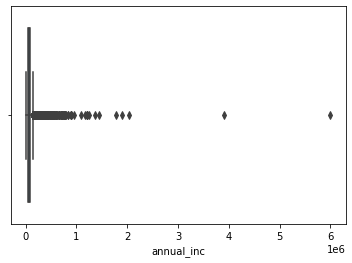

In [54]:
sns.boxplot(df['annual_inc'])

In [55]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [58]:
quantile_data = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [59]:
### The value after 95 percentile seems to be disconnected from the general distribution
### and also there is huge increase in the value for small quantile variation 
per_95_annual_inc = df['annual_inc'].quantile(0.95)
loan_data = df[df.annual_inc <= per_95_annual_inc]

c:\users\ankita\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

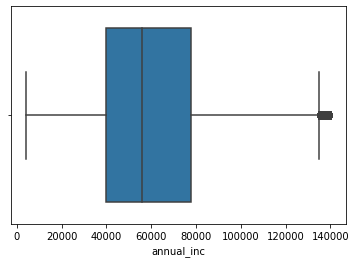

In [60]:
sns.boxplot(loan_data.annual_inc)

### Now we analysising another columns

### 'int_rate' column has percentage (%) symbol in field. So for calculation we have to remove.

In [22]:
df.int_rate = df['int_rate'].apply(lambda x: float(x.split('%')[0]))
df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

### checking outliers in 'int_rate' by box plot

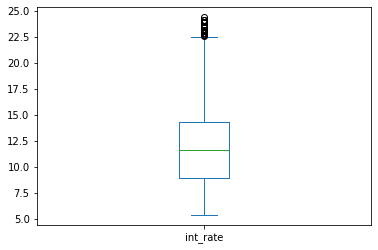

In [23]:
df.int_rate.plot.box()
plt.show()

### ---> As we can see above chart outliers in 'int_rate' we ll ananlysis in univariate analysis <----

### 'term' in data set is stands for --
#### The number of payments on the loan. Values are in months and can be either 36 or 60.

In [24]:
df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

### Analysis for 'grade' -

In [25]:
df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [26]:
df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

### As we can see month and year is concatenated by '-'.
### We need to find month and year for our analysis

In [27]:
month,year = df.issue_d.str.split('-').str

C:\Users\ANKITA\AppData\Local\Temp\ipykernel_22188\3973896583.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  month,year = df.issue_d.str.split('-').str


In [28]:
month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

In [29]:
year.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [30]:
df.issue_m = month # saving month in new column
df.issue_y = pd.to_numeric(year) # saving year in new column

C:\Users\ANKITA\AppData\Local\Temp\ipykernel_22188\1212786523.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.issue_m = month # saving month in new column
C:\Users\ANKITA\AppData\Local\Temp\ipykernel_22188\1212786523.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.issue_y = pd.to_numeric(year) # saving year in new column


### Now we can drop issue_d.

In [31]:
df.drop(columns = ['issue_d'], inplace=True)

In [32]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,Jan-85,1,3,0,13648,83.70%,9,5833.84,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,Apr-99,5,3,0,1687,9.40%,4,1008.71,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,Nov-01,2,2,0,2956,98.50%,10,3005.67,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,Feb-96,1,10,0,5598,21%,37,12231.89,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,Nov-04,3,9,0,7963,28.30%,12,5632.21,0.0


In [33]:
df.emp_title.value_counts().head()

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64

In [34]:
print(df.title.nunique())
print(len(df.title.value_counts()))

19297
19297


### As we can see title column have multiple unique values so.
### So 'title' columns can not help in our analysis
### That's why we can drop this column

In [35]:
df.drop(columns=['title'], inplace=True) # dropping 'title' column from data frame

In [36]:
df.earliest_cr_line.value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [37]:
month, year = df.earliest_cr_line.str.split('-').str
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

C:\Users\ANKITA\AppData\Local\Temp\ipykernel_22188\1966449967.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  month, year = df.earliest_cr_line.str.split('-').str


In [38]:
def get_day_from_earliest_cr_line(data):
    ''' To convert inconsitant month year into days based on today'''
    from datetime import datetime
    current_year = datetime.today().year
    # splitting data into month and year
    month, year = data.split('-')
    
    if year in month_list:
        year,month = month,year
    year = 2000 + int(year)
    
    if year > int(current_year):
        year -= 100
    # converting year month into datetime format
    earliest_cr_date = datetime.strptime(f'{year}-{month}-1', '%Y-%b-%d')
    rest_days = datetime.today()-earliest_cr_date
    return rest_days.days

In [39]:
get_day_from_earliest_cr_line("20-Dec")


553

In [40]:
df.earliest_cr_line = df.earliest_cr_line.apply(get_day_from_earliest_cr_line)

In [41]:
df.earliest_cr_line.describe()

count    38577.000000
mean      9253.981647
std       2491.854695
min       4966.000000
25%       7584.000000
50%       8803.000000
75%      10415.000000
max      27916.000000
Name: earliest_cr_line, dtype: float64

In [42]:
df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [43]:
# removing % to get proper data or value

df.revol_util = df.revol_util.str.replace('%','').astype(float)
df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

## Now data is cleaned. We can start univariate analysis

# Univariate Analysis

<AxesSubplot:xlabel='grade', ylabel='count'>

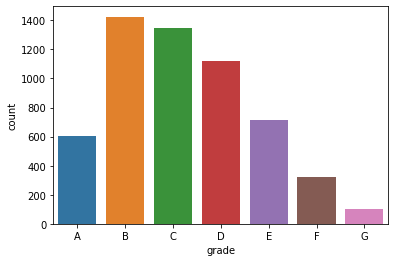

In [63]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
### Adding a new column to identify if loan status is 'Charged Off' or not. Assigning 1 for 'Charged Off' and 0 for not charged off

In [44]:
df['loan_status_bool'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [47]:
### Now let us understand the relationship between loan status and loan amount 

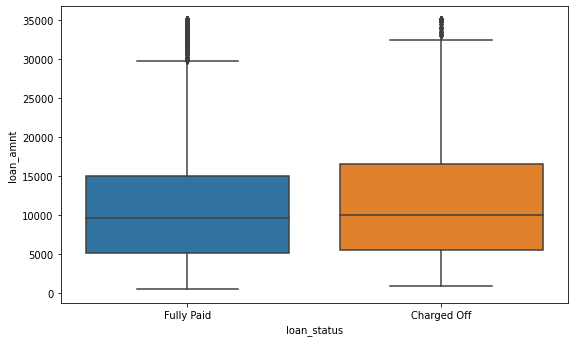

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

In [49]:
### Lets remove the outliers and check other stats

In [46]:
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [51]:
### limitting data to 75% which is roughly 15000

In [47]:
loan_till75 = df.loc[(df['loan_amnt']<=15000)]

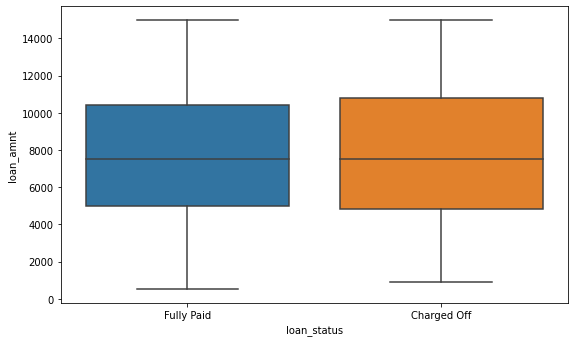

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [54]:
## This shows us that higher amount tends to more Charged Off and lower loan amount the Charged of chances are less.

In [55]:
### Let us understand how each field correlates with the other.

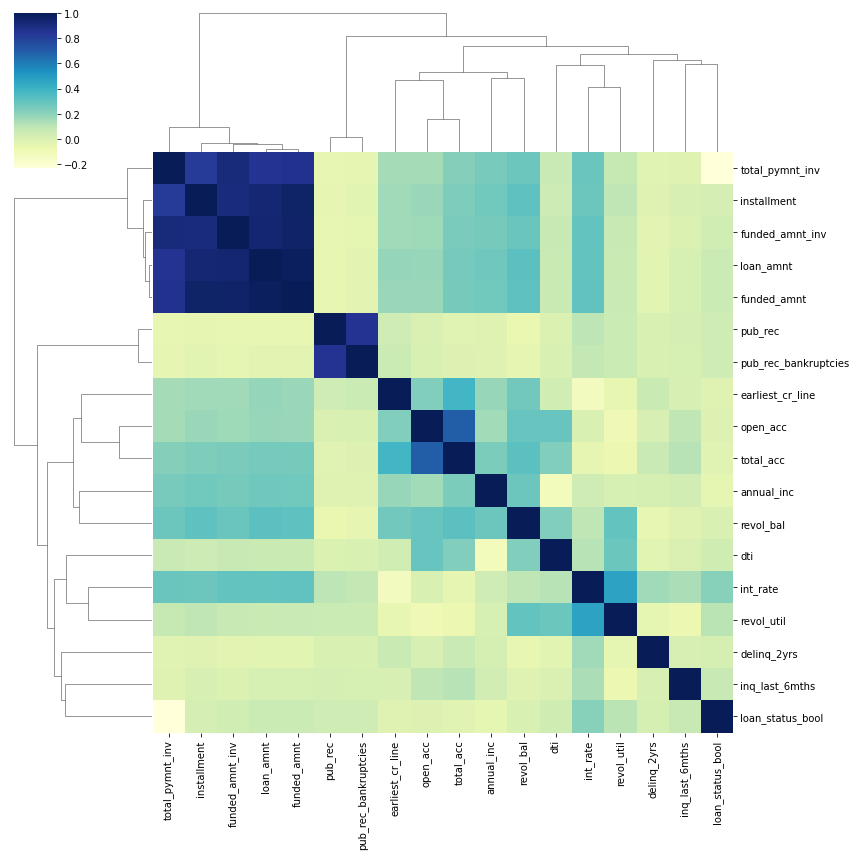

In [49]:
sns.clustermap(data=df.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

In [57]:
### In the above clustermap we find there are 3 main clusters with high correlation. In the 1st cluster we find 5 variables 
### being highly correlated: total_pymnt_inv, installment, funded_amnt_inv, loan_amnt, funded_amnt.
### In the 2nd cluster, the highly correlated values are: pub_rec, pub_rec_bankruptcies.
### the 3rd highly correlated cluster are: open_acc, total_acc

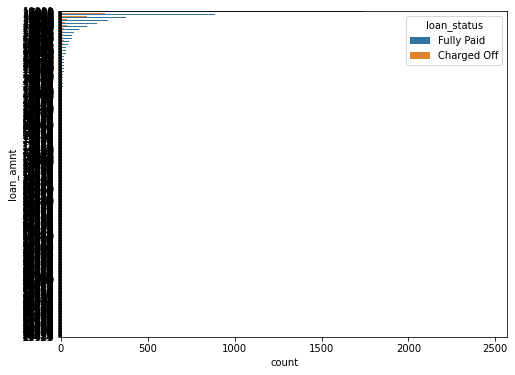

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
column = 'loan_amnt'
plotdata = df
by='loan_status'
sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
              order=plotdata[column].value_counts().index)

plt.show()

df1 = df.groupby([column])[by].value_counts(normalize=True
    ).rename('Charged off %').reset_index().sort_values(column)
df2 = df1.loc[df1[by]=='Charged Off'].sort_values(by=by, ascending=False).drop(columns=[by])
df3 = df.groupby([column])[by].count()
df1 = df1.merge(right=df3,on=column).rename(columns={by:'Record count'})

In [ ]:
### Nothing can be understood from the above. Let us try to make it better.

In [51]:
def ConvertToBins (*, data=df, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [53]:
ConvertToBins(column='loan_amnt')

In [54]:
df.loan_amnt_p

0          Lowest (500.0 - 5000.0)
1          Lowest (500.0 - 5000.0)
2          Lowest (500.0 - 5000.0)
3        Medium (7750.0 - 11200.0)
5          Lowest (500.0 - 5000.0)
                   ...            
39712      Lowest (500.0 - 5000.0)
39713    Medium (7750.0 - 11200.0)
39714      Lowest (500.0 - 5000.0)
39715      Lowest (500.0 - 5000.0)
39716      Lower (5000.0 - 7750.0)
Name: loan_amnt_p, Length: 38577, dtype: category
Categories (5, object): ['Lowest (500.0 - 5000.0)' < 'Lower (5000.0 - 7750.0)' < 'Medium (7750.0 - 11200.0)' < 'Higher (11200.0 - 16000.0)' < 'Highest (16000.0 - 35000.0)']

In [91]:
def UnivariatePlotForCategorical (*, data=df, column, figsize=(8,6), box_plot=False):
    """
        Parameters:
            data : defaulted at the 'df' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
    """

    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data, y=column, hue=by, ax=ax, 
                  order=plotdata[column].value_counts().index)
    plt.show()       

In [96]:
from IPython.display import HTML

def PercentageTable(column, by, data=df):
    df2 = data.groupby([column])[by].value_counts(normalize=True).rename('Charged off %').reset_index().sort_values(column)
    df2 = df2.loc[df2[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
    df3 = data.groupby([column])[by].count()
    df2 = df2.merge(right=df3,on=column).rename(columns={by:'Record count'})
    display(HTML(df2.to_html(index=False)))

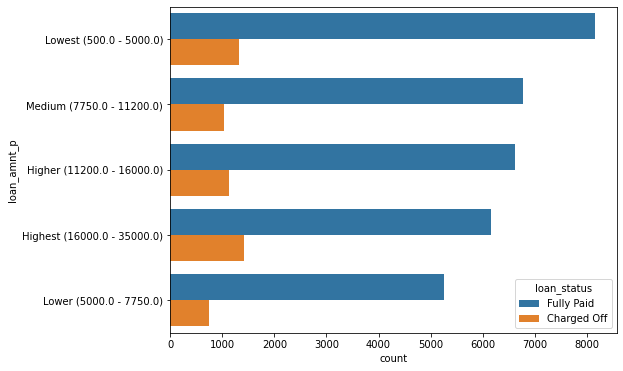

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [90]:
UnivariatePlotForCategorical(column='loan_amnt_p')

### As we can see Fully Paid percentage is more when loan amount is less.
### We can say loan amount is inversely proportional to fully paid.

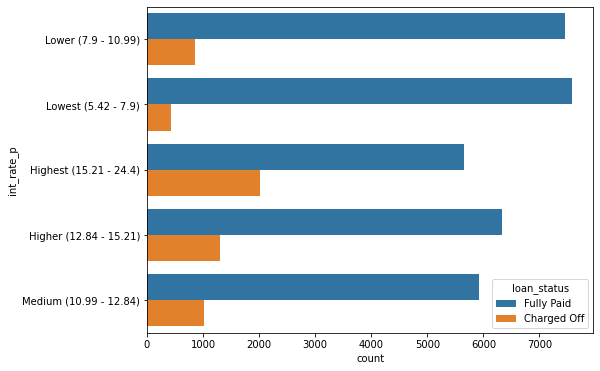

In [69]:
UnivariatePlotForCategorical(column='int_rate_p')

In [ ]:
### Here also we can see the Charged Off percentage is higher for the hgher interest rate.

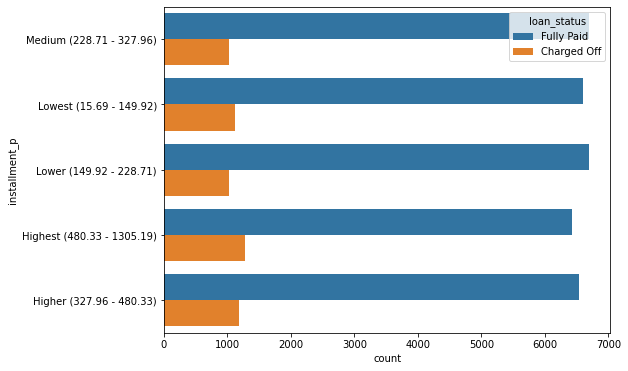

In [70]:
UnivariatePlotForCategorical(column='installment_p')

In [65]:
### Charged off percentage steadily rises with higher installment amount


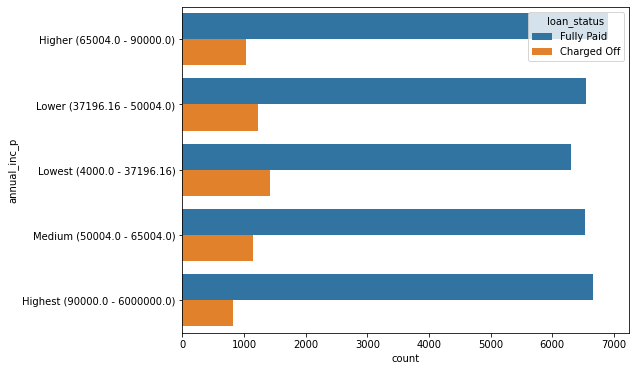

In [71]:
UnivariatePlotForCategorical(column='annual_inc_p')

In [67]:
### In this the lowest annual income group is more likely to get Charged Off

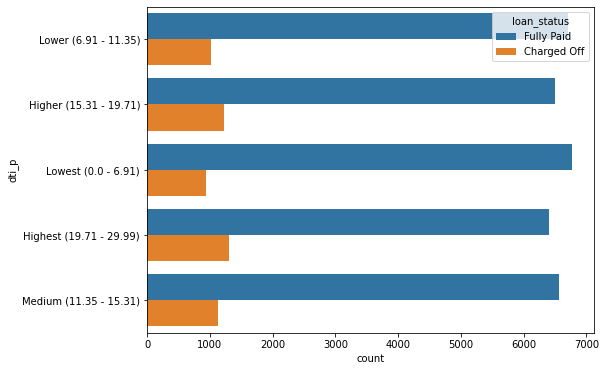

In [72]:
UnivariatePlotForCategorical(column='dti_p')

In [ ]:
### We see that high debt to income ratio results in more chances of Charged Off

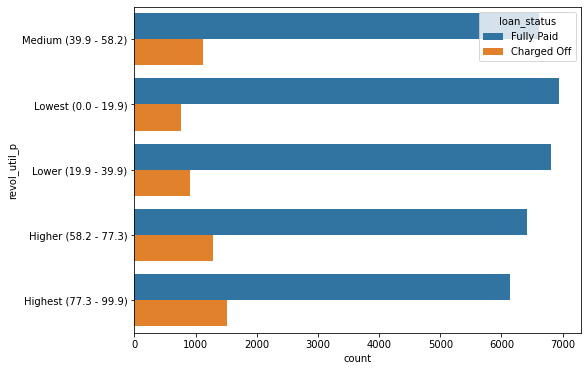

In [73]:
UnivariatePlotForCategorical(column='revol_util_p')

In [ ]:
### Its clear that revolving line utilisation rate has a large impact to the chance of Charged Off

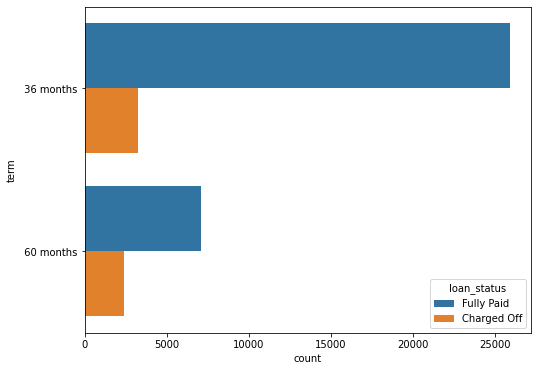

In [74]:
UnivariatePlotForCategorical(column='term')

In [ ]:
### Simply put higher the tenure higher the chances that the loan is fully paid

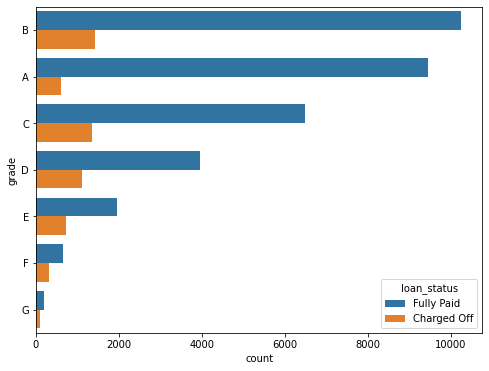

In [75]:
UnivariatePlotForCategorical(column='grade')

In [ ]:
### This varies hugely with grade and does not follow a pattern.

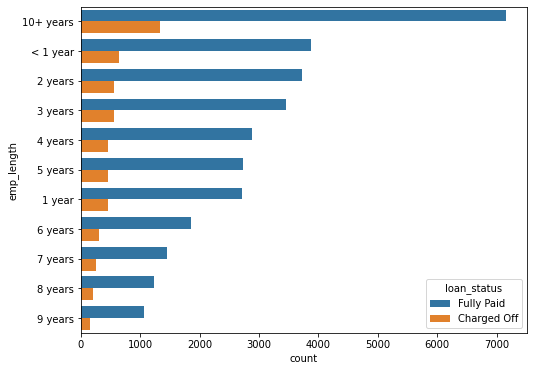

In [76]:
UnivariatePlotForCategorical(column='emp_length')

In [ ]:
### Employement length does not tell us much about if loan will default or get fully paid

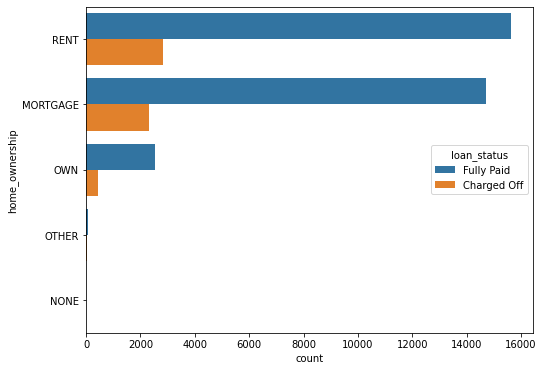

In [78]:
UnivariatePlotForCategorical(column='home_ownership')

In [ ]:
### It is clear that owning a house has very less chances of being Charged Off

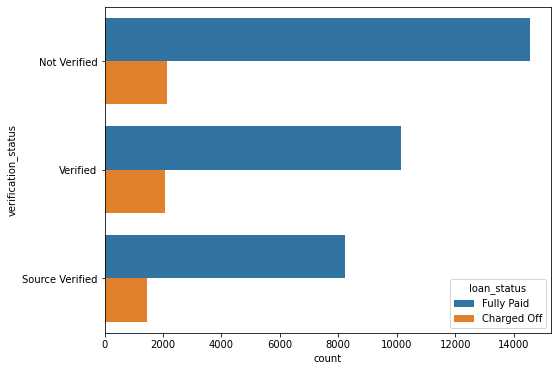

In [79]:
UnivariatePlotForCategorical(column='verification_status')

In [97]:
PercentageTable("verification_status", "loan_status")

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [ ]:
### verified applicants have more defaulted % which means the verification process is not correct.

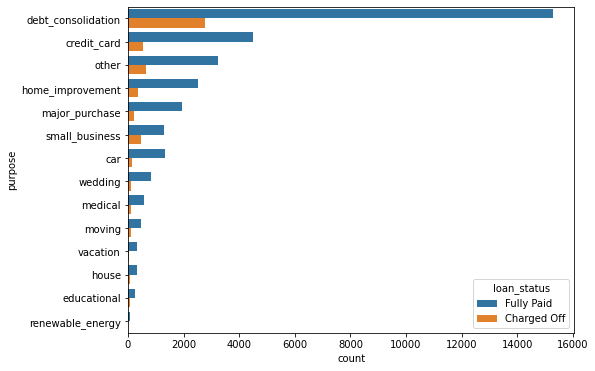

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [98]:
UnivariatePlotForCategorical(column='purpose')
PercentageTable("purpose", "loan_status")

In [ ]:
### The table makes it clear that loans taken for small_business, renewable_energy and educational are the riskier ones

In [ ]:
# Let us now understand for Bivariate analysis by taking groups of variables

In [102]:
def Bivariate_Categorical (*, data=df, x, y, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_bool', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    plt.show()

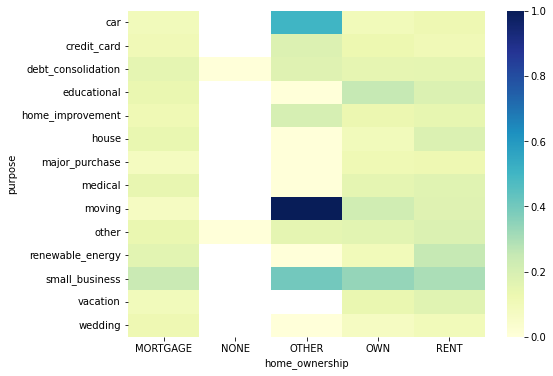

In [103]:
Bivariate_Categorical(x='home_ownership', y='purpose')

In [ ]:
### From this it is clear that for other category of home_ownership it is most risky when the loan purpose is Moving and Car

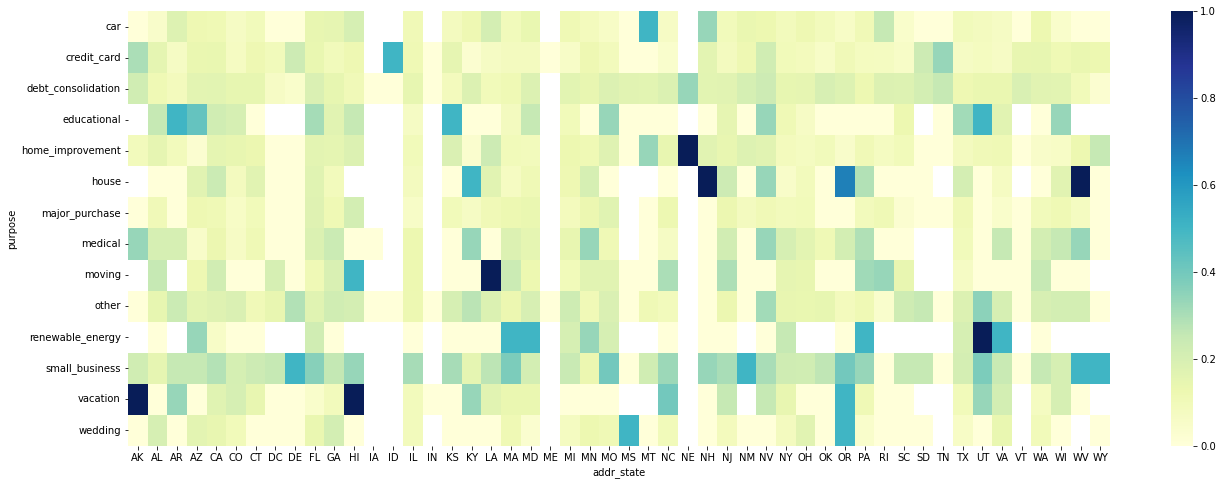

In [104]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

In [ ]:
### From this it is clear that for certain states, 
### loan taken for vacation is the most risky, 
### for some states NE and NH house and home improvement loans are risky. 
### For NE state, mostly the loans across different purpose are not that risky. 
### Loans taken in the states of IA, ID, IN, ME, VT are not that risky. 
### Loans taken for small business is consistently mildly risky across all states. 
### Renewable energy, credit card and wedding loans are comparably safer than others 

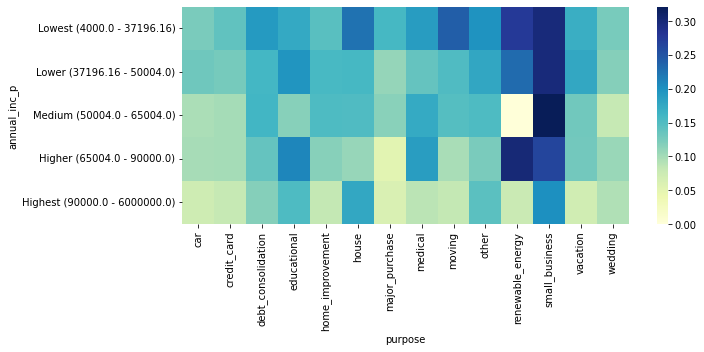

In [105]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

In [ ]:
### we can clearly see that, small_business and renewable energy are the riskiest among all annual income categories

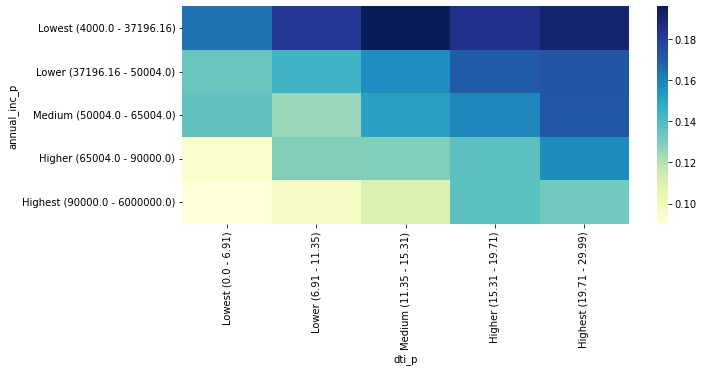

In [106]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

In [ ]:
### Very obvious that the lowest annual income category is the most risky among all debt to income ratio categories

In [65]:
# Conclusion

In [66]:
### Hence now we have arrived at some great conclusions after the analysis. 
### Below are listed some of the important factors according to me but there can be other factors also

In [67]:
## These factors have minor impact on loan being Charged Off:
### Higher Loan amount, Higher installment amount, Lower annual income, Higher dti ratio, Applicant's addressed state

In [68]:
## The following factors are mostly the major impact on loan being Charged Off:
### Higher interest Rate, Repayment term, Loan purpose, Derogatory public records, public bankruptcy records, loan grade

In [69]:
## These are the combined impacts on loan being Charged Off:
### High loan amount and interest rate for lower income group, High installment and longer repayment term, 
### home ownership and loan purpose, Residential State and loan purpose, Income group and loan purpose